In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt


import warnings
warnings.filterwarnings('ignore')

In [33]:
train_data=pd.read_csv("data/train_data.csv")
valid_data=pd.read_csv("data/valid_data.csv")

In [34]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [35]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


In [36]:
train_data.timestamp=pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index=train_data.timestamp

In [37]:
valid_data.timestamp=pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index=valid_data.timestamp

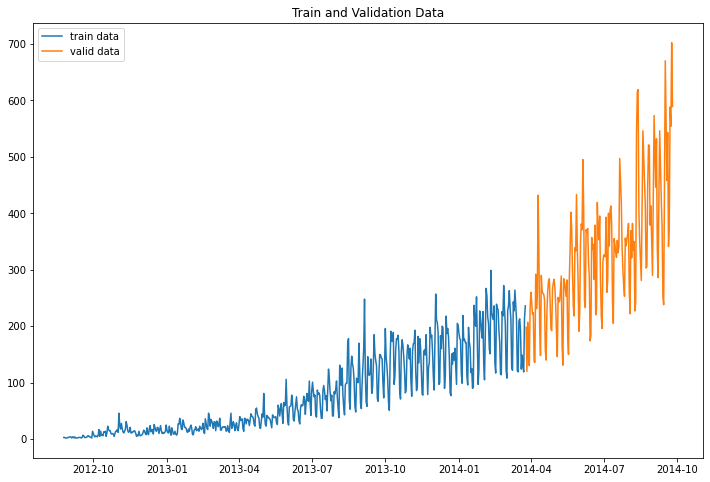

In [38]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.legend(loc='best')
plt.title('Train and Validation Data')
plt.show()

#### Simple Exponential Smoothing

In [39]:
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [40]:
model=SimpleExpSmoothing(np.asarray(train_data['count']))
with model.fix_params({'smoothing_level':0.7,'initial_level':3}):
    model=model.fit(optimized=False)

valid_data['SES']=model.forecast(len(valid_data))

In [41]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

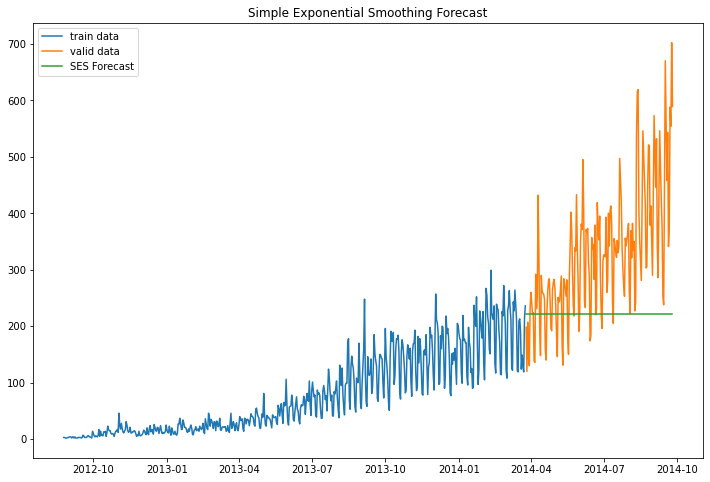

In [42]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.plot(valid_data.index,valid_data['SES'],label='SES Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Forecast')
plt.show()

In [43]:
valid_data.head()

,Date,count,SES
Date,,,
2014-03-26,2014-03-26,198,221.273571
2014-03-27,2014-03-27,120,221.273571
2014-03-28,2014-03-28,207,221.273571
2014-03-29,2014-03-29,145,221.273571
2014-03-30,2014-03-30,130,221.273571


In [44]:
#calculating rmse

rmse_ses=sqrt(mean_squared_error(valid_data['count'],valid_data['SES']))
print('The RMSE value for Simple Exponential Smoothing Approach',rmse_ses)

The RMSE value for Simple Exponential Smoothing Approach 156.57206825628182


#### Double Exponential Smoothing

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [46]:
model=ExponentialSmoothing(np.asarray(train_data['count']),trend='add')#initial_slope=1.2
with model.fix_params({}):
    model=model.fit(smoothing_level=0.7,smoothing_slope=0.0001)
    
valid_data['holt_linear']=model.forecast(len(valid_data))

In [47]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2.3712805488005864,
 'initial_trend': 0.37890137572965205,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

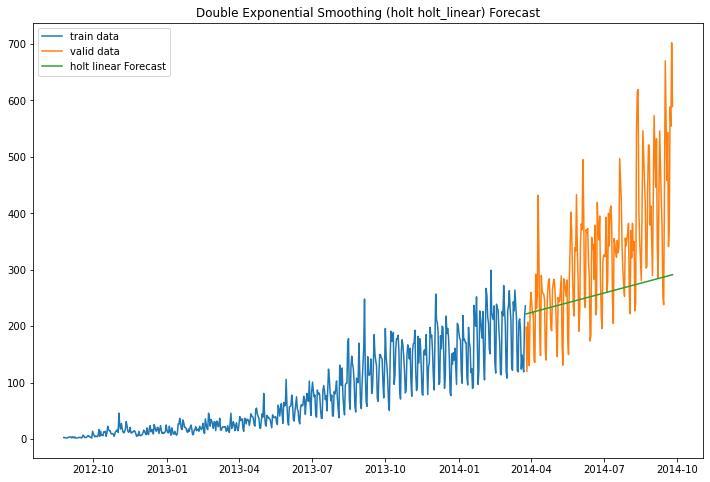

In [48]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.plot(valid_data.index,valid_data['holt_linear'],label='holt linear Forecast')
plt.legend(loc='best')
plt.title('Double Exponential Smoothing (holt holt_linear) Forecast')
plt.show()

In [49]:
#calculating rmse

rmse_holt=sqrt(mean_squared_error(valid_data['count'],valid_data['holt_linear']))
print('The RMSE value for Double Exponential Smoothing Approach',rmse_holt)

The RMSE value for Double Exponential Smoothing Approach 124.59568786079075


#### Holt Winter's (Triple Exponential Smoothing)

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing

In [57]:
model=ExponentialSmoothing(np.asarray(train_data['count']),seasonal_periods=7,trend='add',seasonal='mul')#initial_slope=1.2
fit1=model.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.8)
    
valid_data['holt_winter']=fit1.forecast(len(valid_data))

In [55]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': 0.001,
 'smoothing_seasonal': 0.8,
 'damping_trend': nan,
 'initial_level': 0.31989274889100755,
 'initial_trend': 2.08991571664667,
 'initial_seasons': array([1.75233105, 1.292591  , 0.60243762, 0.42333694, 0.51984229,
        0.80372848, 0.96678636]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

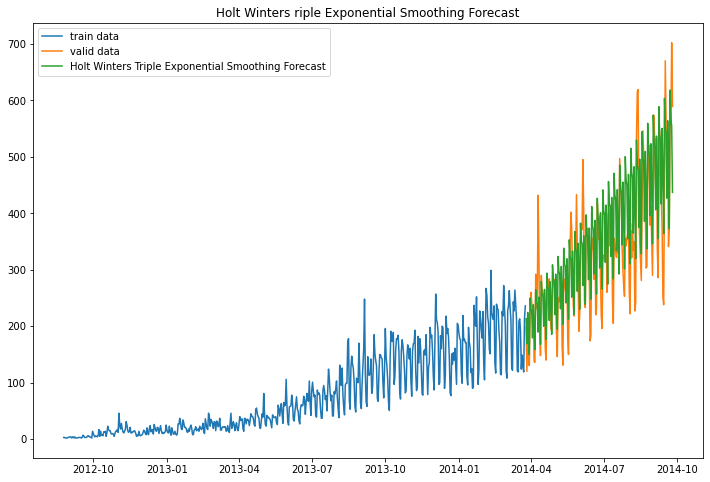

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count'],label='train data')
plt.plot(valid_data.index,valid_data['count'],label='valid data')
plt.plot(valid_data.index,valid_data['holt_winter'],label='Holt Winters Triple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Holt Winters riple Exponential Smoothing Forecast')
plt.show()

In [60]:
#calculating rmse

rmse_win=sqrt(mean_squared_error(valid_data['count'],valid_data['holt_winter']))
print('The RMSE value for Holt Winters riple Exponential Smoothing Approach',rmse_win)

The RMSE value for Holt Winters riple Exponential Smoothing Approach 78.59684424893284
